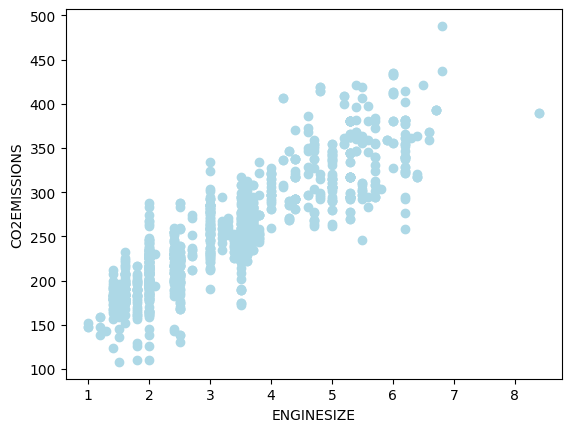

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()


plt.scatter(data['ENGINESIZE'] , data['CO2EMISSIONS'] , color='lightblue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()




In [140]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]


In [141]:
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)


LinearRegression()

In [142]:
print ('coefficients : ',regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept


coefficients :  [[39.51350155]]
Intercept :  [123.97677484]


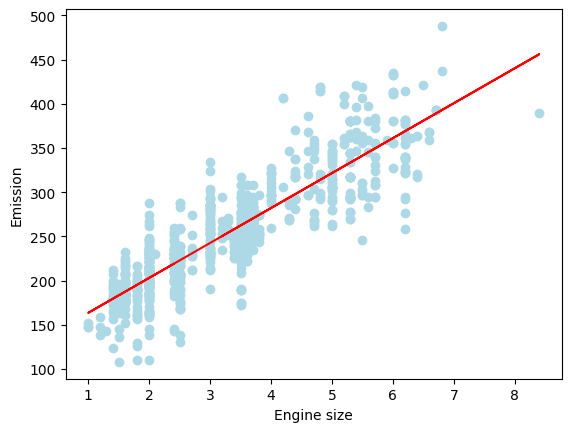

In [143]:
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='lightblue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.savefig('Linear Regression.png', dpi=300, transparent=True)


In [144]:
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values


In [145]:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)


Estimated Emission : 262.2740302496799


In [146]:
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
prediction = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Mean sum of squares (MSS): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, prediction) )


Mean absolute error: 21.66
Mean sum of squares (MSS): 775.10
R2-score: 0.77


## Polynomial Regression

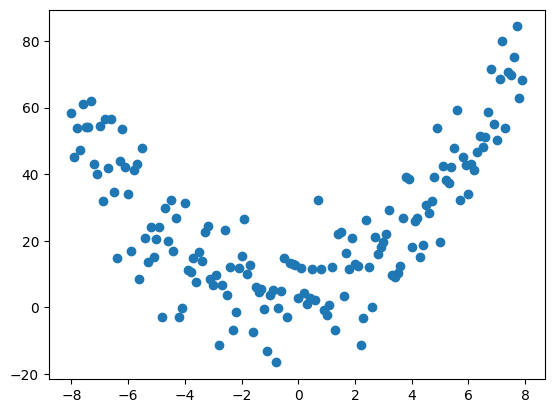

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics

x = np.arange(-8,8,0.1)
rand = 10 * np.random.normal(size = len(x))
y = 1*(x**2) + 1*x + 5+rand
plt.scatter(x,y)


In [148]:
d = {'x':x,'y':y}
data = pd.DataFrame(d)


In [149]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [150]:
train_x = np.array(train[['x']])
train_y = np.array(train[['y']])


test_x = np.array(test[['x']])
test_y = np.array(test[['y']])


In [151]:
nb_degree = 1
polynomial_features = preprocessing.PolynomialFeatures(degree = nb_degree)


In [152]:
train_x_transformed = polynomial_features.fit_transform(train_x.reshape(-1,1))


In [153]:
model = linear_model.LinearRegression()
model.fit(train_x_transformed, train_y)

LinearRegression()

In [154]:
test_x_transformed = polynomial_features.fit_transform(test_x.reshape(-1,1))
prediction = model.predict(test_x_transformed)


In [155]:
rmse = np.sqrt(metrics.mean_squared_error(test_y,prediction))
r2 = metrics.r2_score(test_y, prediction)
print('RMSE: ', rmse)
print('R2: ', r2)


RMSE:  9.488675243266895
R2:  0.8415065844488889


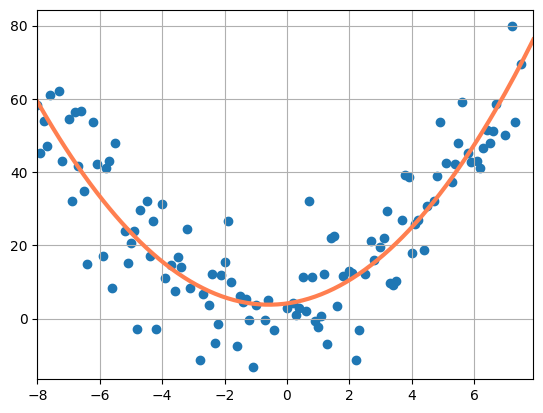

In [156]:
x_transformed = polynomial_features.fit_transform(x.reshape(-1,1))
prediction_train = model.predict(x_transformed)

x_min = np.amin(x)
x_max = np.amax(x)
y_min = np.amin(y)
y_max = np.amax(y)

x_new = np.linspace(x_min, x_max, len(x_transformed))
x_new = x_new[:,np.newaxis]

plt.plot(x_new, prediction_train, color='coral', linewidth=3)
plt.grid()
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.scatter(train_x,train_y)
